In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Import el df y lo muestro
df = pd.read_csv('StudentPerformanceFactors.csv')
display(df)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [56]:
# Overview a los principales tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [57]:
# Overview de los valores estadísticos
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [58]:
# Veo los nulls por columna (hay nulls en 3 columnas de texto categórico)
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [59]:
# Lleno los nulos de las 3 columnas categóricas con la moda
df['Teacher_Quality'] = df['Teacher_Quality'] \
    .fillna(df['Teacher_Quality'].mode()[0])
    
df['Parental_Education_Level'] = df['Parental_Education_Level'] \
    .fillna(df['Parental_Education_Level'].mode()[0])

df['Distance_from_Home'] = df['Distance_from_Home'] \
    .fillna(df['Distance_from_Home'].mode()[0])
    
# Resultados
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [60]:
# Traduzco los valores más relevantes

# Lista + Loop para traducir todas las columnas con valores de Low - High
col = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
       'Family_Income', 'Teacher_Quality']

for x in col:
    df[x] = np.where(df[x] == 'Low', 'Bajo', 
                  np.where(df[x] == 'Medium', 'Medio', 
                           np.where(df[x] == 'High', 'Alto', df[x])))
  
# Lista + Loop para traducir Yes a Sí    
col2 = ['Extracurricular_Activities', 'Internet_Access']
for x in col2:
    df[x] = np.where(df[x] == 'Yes', 'Sí', df[x])

# Dictionario + Loop para Traducir columna Peer Influence
col3 = {'Positive': 'Positiva', 'Negative': 'Negativa'}
for x, y in col3.items():
    df['Peer_Influence'] = np.where(df['Peer_Influence'] == x, y, \
        df['Peer_Influence'])

# Diccionario + Loop para Traducir Columna Parental Education Level
col4 = {'High School' : 'Secundario', 'College': 'Universitario',
        'Postgraduate': 'Posgrado'}
for x, y in col4.items():
    df['Parental_Education_Level'] = np.where(df['Parental_Education_Level'] \
        == x, y, df['Parental_Education_Level'])
    
# Traducción de Tipo de Escuela
df['School_Type'] = np.where(df['School_Type'] == 'Public', 'Pública', \
    np.where(df['School_Type'] == 'Private', 'Privada', df['School_Type']))

# Traducción de Distance from home
col5 = {'Near': 'Cerca', 'Moderate': 'Moderada', 'Far':'Lejana'}
for x, y in col5.items():
    df['Distance_from_Home'] = np.where(df['Distance_from_Home'] == x, y, 
                                        df['Distance_from_Home'])


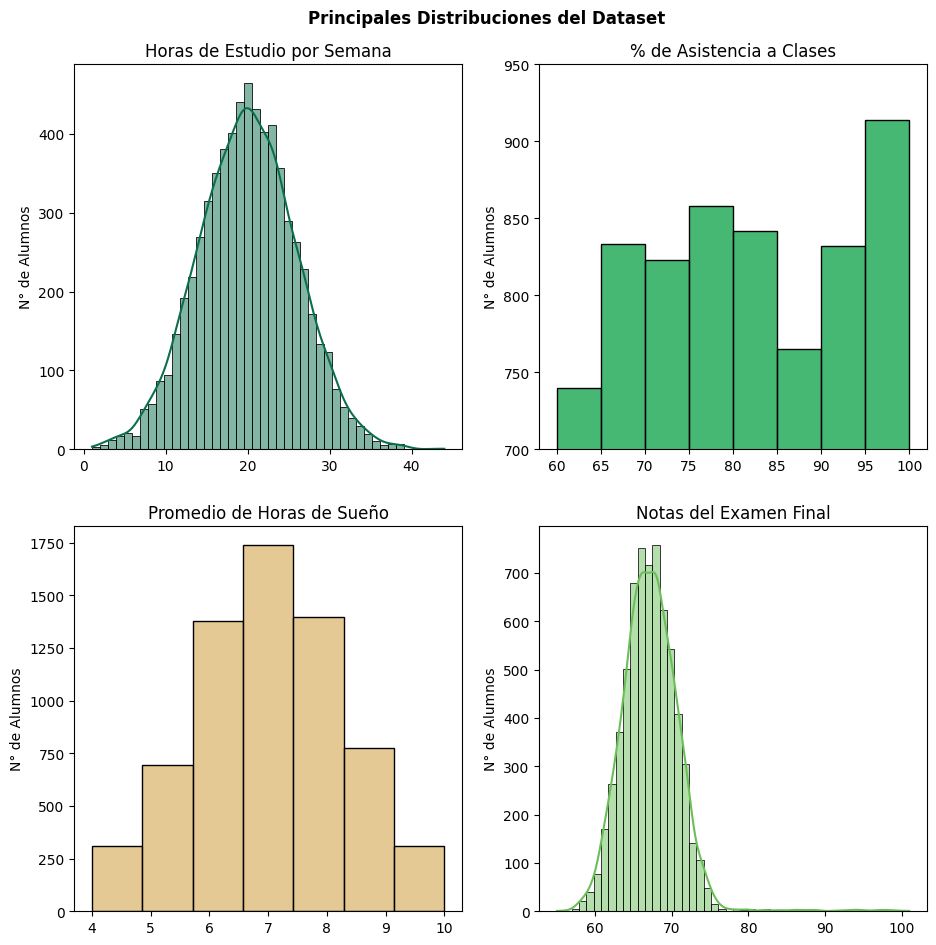

In [61]:
# Principales distribuciones del dataset

# Creo la figura y axis
fig, axes = plt.subplots(2, 2, figsize=(11, 11))

# Título del Fig
fig.suptitle('Principales Distribuciones del Dataset', fontweight='bold',
             y=0.93)

# Gráfico 1 - Distribución de Horas Estudiadas
sns.histplot(data=df, x='Hours_Studied', kde=True, ax=axes[0,0], 
             color='#0B6E4F', bins=44)
axes[0][0].set_title('Horas de Estudio por Semana')
axes[0][0].set(ylabel='N° de Alumnos', xlabel='')

# Gráfico 2 - Distribución de Attendance
sns.histplot(data=df, x='Attendance', ax=axes[0,1], color='#08A045',
             bins=8)
axes[0][1].set_title('% de Asistencia a Clases')
axes[0][1].set(ylabel='N° de Alumnos', xlabel='')
axes[0][1].set_ylim(700, 950)

# Gráfico 3 - Distribución de Horas Dormidas
sns.histplot(data=df, x='Sleep_Hours', ax=axes[1,0], color='#DDB771', 
            bins=7)
axes[1][0].set_title('Promedio de Horas de Sueño')
axes[1][0].set(ylabel='N° de Alumnos', xlabel='')

# Gráfico 4 - Distribución de Horas de Actividad Física
sns.histplot(data=df, x='Exam_Score', ax=axes[1,1], color='#6BBF59',
             bins=48, kde=True)
axes[1][1].set_title('Notas del Examen Final')
axes[1][1].set(ylabel='N° de Alumnos', xlabel='')

plt.show()

In [62]:
# Creación de listas de orden para los plots
bma = ['Bajo', 'Medio', 'Alto']
nnp = ['Negativa', 'Neutral', 'Positiva']
nota = 'Nota del Examen Final'

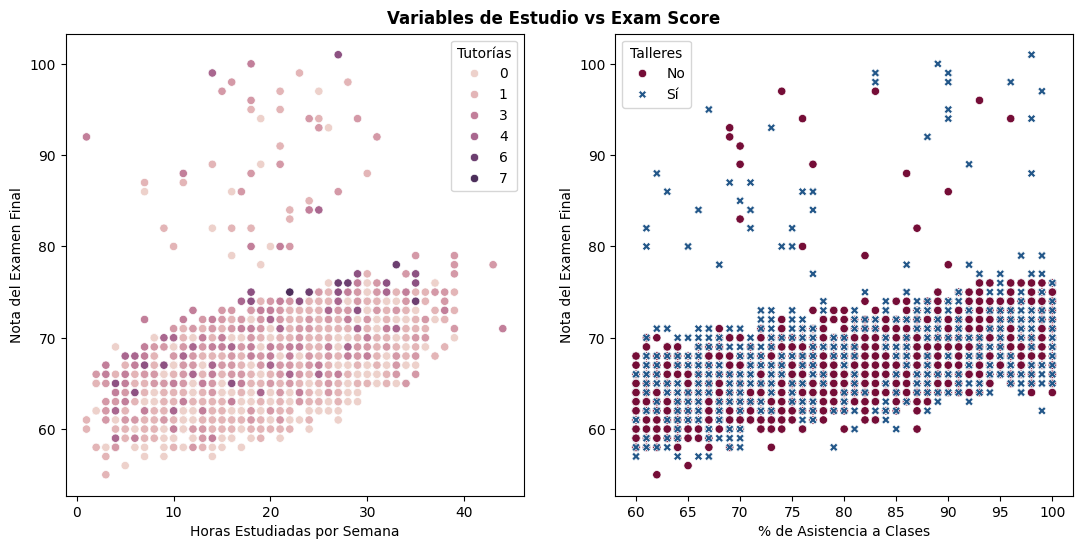

In [63]:
# Variables de Estudio vs Exam Score

# Creación de la figura y axis
fig, axes = plt.subplots(1,2, figsize=(13,6))

# Datos de título del Fig
fig.suptitle('Variables de Estudio vs Exam Score', fontweight='bold',
             y=0.92)

# Gráfico 1 - Horas de Estudio vs Nota Final
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score',
            hue='Tutoring_Sessions', ax=axes[0])
axes[0].set(xlabel='Horas Estudiadas por Semana', 
            ylabel=nota)
axes[0].legend(title='Tutorías', loc='upper right')

# Gráfico 2 - Attendance vs Nota Final
sns.scatterplot(data=df, x='Attendance', y='Exam_Score', 
                style='Extracurricular_Activities',
                hue='Extracurricular_Activities', 
                palette=['#750D37', '#235789'])
axes[1].set(xlabel='% de Asistencia a Clases', ylabel=nota)
axes[1].legend(title='Talleres')

plt.show()

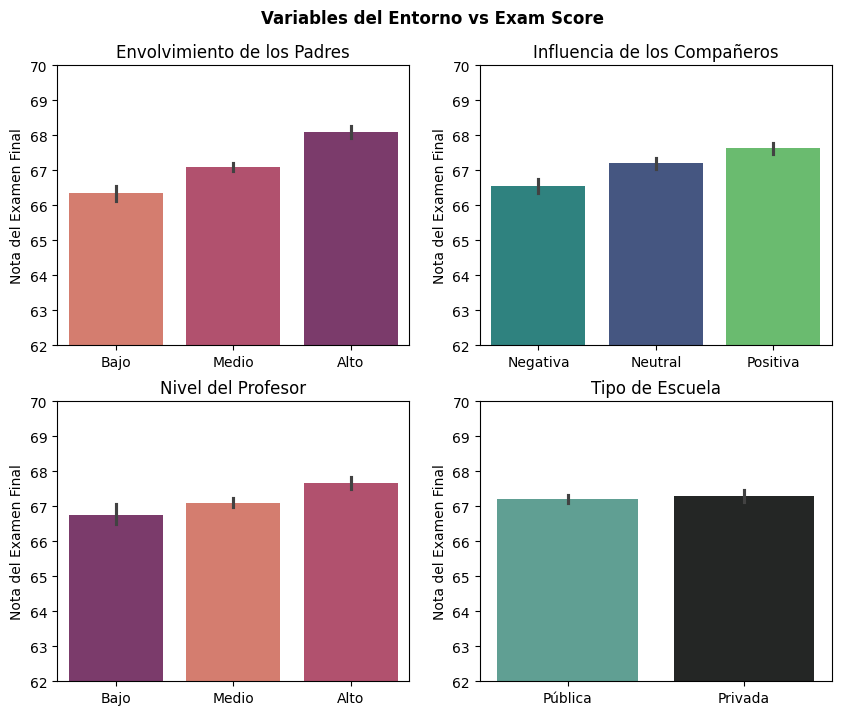

In [64]:
# Variables de Entorno vs Exam Score
fig, axe = plt.subplots(2, 2, figsize=(10,8))

# Título del figure
fig.suptitle('Variables del Entorno vs Exam Score', y=0.95, fontweight='bold')

# Gráfico 1 - Exam Score vs Parental Involvement
sns.barplot(data=df, x='Parental_Involvement', y='Exam_Score', ax=axe[0,0],
            order=bma, palette='flare', hue='Parental_Involvement')
axe[0][0].set_title('Envolvimiento de los Padres')
axe[0][0].set(xlabel='', ylabel=nota)
axe[0][0].set_ylim(62, 70)

# Gráfico 2 - Exam Score vs Peer Influence
sns.barplot(data=df, x='Peer_Influence', y='Exam_Score', ax=axe[0,1],
            order=nnp, palette='viridis_r', hue='Peer_Influence')
axe[0][1].set_title('Influencia de los Compañeros')
axe[0][1].set(xlabel='', ylabel=nota)
axe[0][1].set_ylim(62, 70)

# Gráfico 3 - Exam Score vs Teacher Quality
sns.barplot(data=df, x='Teacher_Quality', y='Exam_Score', ax=axe[1,0],
            order=bma, palette='flare', hue='Teacher_Quality')
axe[1][0].set_title('Nivel del Profesor')
axe[1][0].set(xlabel='', ylabel=nota)
axe[1][0].set_ylim(62, 70)

# Gráfico 4 - Exam Score vs School Type
sns.barplot(data=df, x='School_Type', y='Exam_Score', ax=axe[1,1], 
            palette='dark:#5A9_r', hue='School_Type')
axe[1][1].set_title('Tipo de Escuela')
axe[1][1].set(xlabel='', ylabel=nota)
axe[1][1].set_ylim(62, 70)

plt.show()

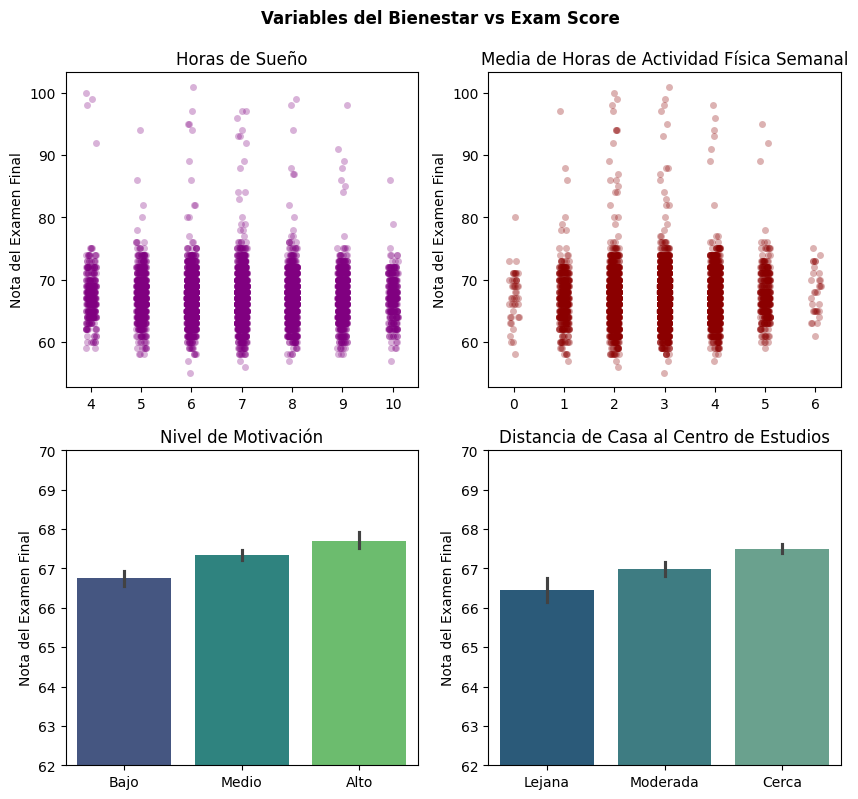

In [65]:
# Variables de Bienestar vs Exam Score

# Creo el fig y le pongo título
fig, axe = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Variables del Bienestar vs Exam Score', fontweight='bold',
             y=0.95)

# Gráfico 1 - Horas de Sueño por Nota del Examen Final
sns.stripplot(data=df, x='Sleep_Hours', y='Exam_Score', alpha=0.3, 
                ax=axe[0,0], color='purple')
axe[0][0].set_title('Horas de Sueño')
axe[0][0].set(xlabel='', ylabel=nota)

# Gráfico 2 - Media de Horas de Actividad Física semanal vs Exam Score
sns.stripplot(data=df, x='Physical_Activity', y='Exam_Score', ax=axe[0,1],
                color='darkred', alpha=0.3)
axe[0][1].set_title('Media de Horas de Actividad Física Semanal')
axe[0][1].set(xlabel='', ylabel=nota)

# Gráfico 3 - Nivel de Motivación por nota del Examen Final
sns.barplot(data=df, x='Motivation_Level', y='Exam_Score', ax=axe[1,0], 
            palette='viridis', hue='Motivation_Level')
axe[1][0].set_title('Nivel de Motivación')
axe[1][0].set(xlabel='', ylabel=nota)
axe[1][0].set_ylim(62, 70)

# Gráifo 4 - Distancia desde casa vs nota del Examen Final
sns.barplot(data=df, x='Distance_from_Home', y='Exam_Score', ax=axe[1, 1],
            order=['Lejana', 'Moderada', 'Cerca'], palette='crest',
            hue='Distance_from_Home')
axe[1][1].set_title('Distancia de Casa al Centro de Estudios')
axe[1][1].set(xlabel='', ylabel=nota)
axe[1][1].set_ylim(62, 70)

plt.show()

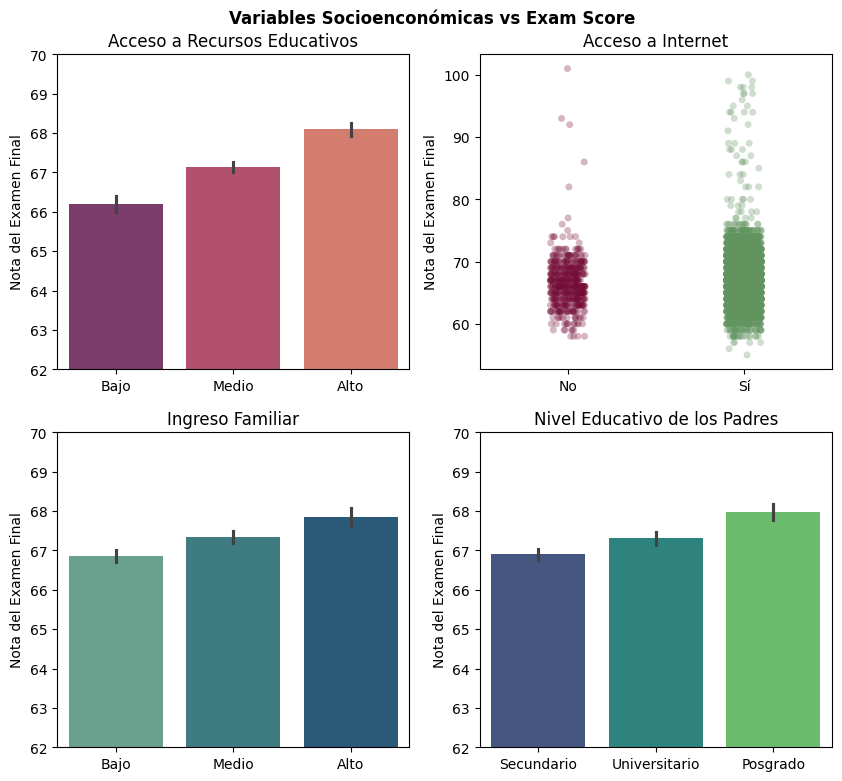

In [119]:
# Variables Socioeconómicas vs Exam Score

# Creo el fig, axes y titulo 
fig, axe = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Variables Socioenconómicas vs Exam Score', fontweight='bold',
             y=0.93)

# Gráfico 1 - Exam Score vs Acces to Resources
sns.barplot(data=df, x='Access_to_Resources', y='Exam_Score', ax=axe[0,0], 
            order=['Bajo', 'Medio', 'Alto'], hue='Access_to_Resources',
            palette='flare')
axe[0][0].set_title('Acceso a Recursos Educativos')
axe[0][0].set(xlabel='', ylabel=nota)
axe[0][0].set_ylim(62, 70)

# Gráfico 2 - Exam Score vs Acceso a Internet
sns.stripplot(data=df, x='Internet_Access', y='Exam_Score', ax=axe[0,1], 
            alpha=0.3, order=['No', 'Sí'], hue='Internet_Access',
            palette={'No': '#750D37', 'Sí': '#629460'})
axe[0][1].set_title('Acceso a Internet')
axe[0][1].set(xlabel='', ylabel=nota)

# Gráfico 3 - Exam Score vs Family Income
sns.barplot(data=df, x='Family_Income', y='Exam_Score', ax=axe[1,0],
            hue='Family_Income', palette='crest')
axe[1][0].set_title('Ingreso Familiar')
axe[1][0].set(xlabel='', ylabel=nota)
axe[1][0].set_ylim(62,70)

# Gráfico 4 - Exam Score vs Parental Education Level
sns.barplot(data=df, x='Parental_Education_Level', y='Exam_Score', 
            ax=axe[1,1], hue='Parental_Education_Level', palette='viridis')
axe[1][1].set_title('Nivel Educativo de los Padres')
axe[1][1].set(xlabel='', ylabel=nota)
axe[1][1].set_ylim(62,70)

plt.show()